In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


In [2]:
ks = [100]
t1, t2 = 9, -1
pos = NOUN

measures_birds_leuven = {}
measures_birds_rosch = {}
for k in ks:
    measures_birds_leuven[k] = nn_measure_over_words(words_leuven, pos, pos_data, data, t1, t2, k)
    measures_birds_rosch[k] = nn_measure_over_words(words_rosch, pos, pos_data, data, t1, t2, k)


In [3]:
# regression analyses
# print regression results
t_to_use = 1890

print('Rosch bird words')
bird_rosch_words = measures_birds_rosch[100].keys()
freqs = {w: np.log(freqs_all[w][t_to_use]) for w in bird_rosch_words}
result_rosch, n_rosch, pr_rosch, pp_rosch, pr2_rosch, pp2_rosch = regression_results(bird_rosch_words, measures_birds_rosch[100], proto_rosch, freqs)
print('----------------------------------------', '\n', '\n', '\n', '\n',)
print('Leuven bird words')
bird_leuven_words = measures_birds_leuven[100].keys()
freqs = {w: np.log(freqs_all[w][t_to_use]) for w in bird_leuven_words}
result_leuven, n_leuven, pr_leuven, pp_leuven, pr2_leuven, pp2_leuven = regression_results(bird_leuven_words, measures_birds_leuven[100], proto_leuven, freqs)
print('----------------------------------------', '\n', '\n', '\n', '\n',)


Rosch bird words
                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     11.61
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.16e-05
Time:                        14:34:05   Log-Likelihood:                 65.156
No. Observations:                  38   AIC:                            -122.3
Df Residuals:                      34   BIC:                            -115.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.479

Leuven change vs prototypicality
Pearson: r=0.243367, p-value=0.241090
Spearman: r=0.077443, p-value=0.712913
Rosch change vs prototypicality
Pearson: r=0.330583, p-value=0.042646
Spearman: r=0.216684, p-value=0.191316


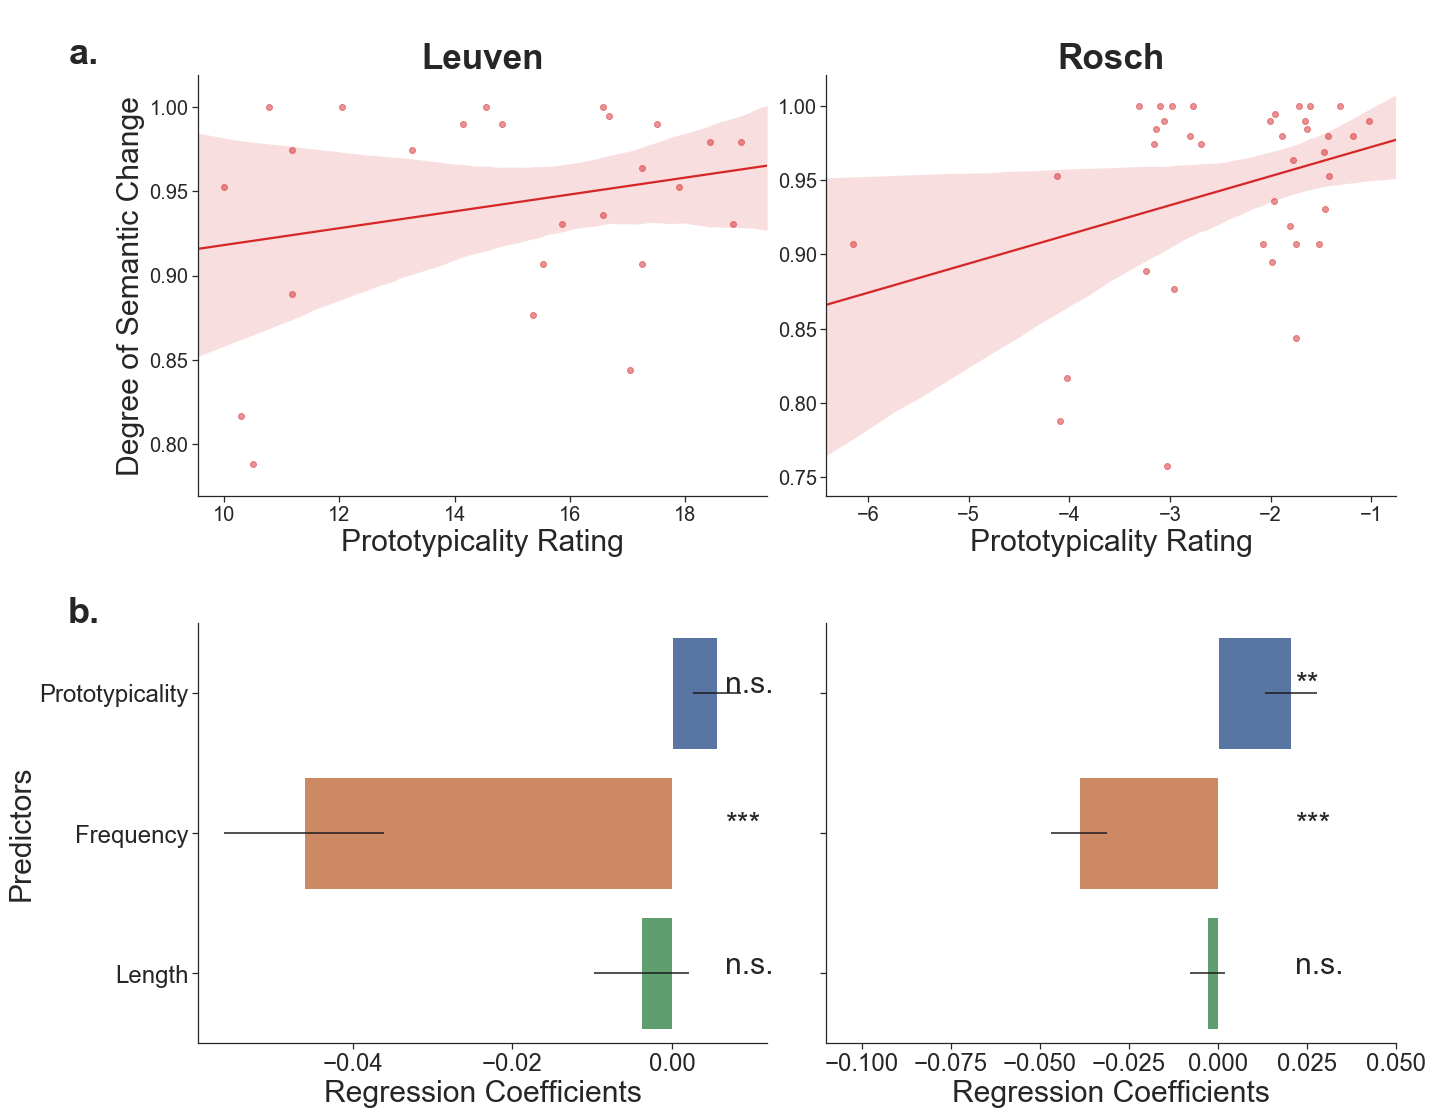

In [4]:
# figure 4
# bird names
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("ticks")

fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20, 16))
axes[0][0].set_title('Leuven', fontsize=35, weight='bold')
axes[0][1].set_title('Rosch', fontsize=35, weight='bold')

print('Leuven change vs prototypicality')
axes[0][0] = plot_change_scatter(axes[0][0], bird_leuven_words, proto_leuven, measures_birds_leuven[100])
print('Rosch change vs prototypicality')
axes[0][1] = plot_change_scatter(axes[0][1], bird_rosch_words, proto_rosch, measures_birds_rosch[100])
axes[0][1].set_ylabel('')

axes[1][0] = plot_coefficents(axes[1][0], result_leuven, ['Prototypicality', 'Frequency', 'Length'])
axes[1][1] = plot_coefficents(axes[1][1], result_rosch, ['Prototypicality', 'Frequency', 'Length'])
axes[1][1].set_ylabel('')
axes[1][1].set_yticklabels([])
axes[1][1].set_xlim((-0.11, 0.05))

axes[0,0].annotate('b.',
            xy=(-0.2, 0.45), xytext=(-0.2, 0.45),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[0,0].annotate('a.',
            xy=(-0.2, 0.95), xytext=(-0.2, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure4.'+img_format, format=img_format, bbox_inches='tight')

